In [8]:
import os
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import DataFrameMaker
from mu2e.mu2eplots import mu2e_plot, mu2e_plot3d
from matplotlib import gridspec
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
import pandas as pd
from time import sleep
import plotly.io as pio
from plotly.offline import init_notebook_mode
from skhep.visual import MplPlotter as splt
from copy import deepcopy
from lmfit import Model, Parameters, report_fit
from hallprobesim_redux import *
from tqdm import tnrange, tqdm_notebook
import pandas as pd
import seaborn as sns

# Overview Plots

In [3]:
df_1m = DataFrameMaker(mu2e_ext_path+'datafiles/FieldMapsCole/high_granularity_bfield_map_r1m_p10cm_3711104pts_10-07_120052',input_type = 'pkl').data_frame

# Determining Optimal Number of Free Params

In [5]:
df_aic_cyl = pd.DataFrame(columns=['ms', 'ns', 'AIC', 'chi2', 'redchi'])
# lenscale = [0.25*x for x in range(4,20)]
ms = [5]#range(5,5)
ns = [3]#range(3,3)
#ms = range(2,8)
#ns = range(2,5)

# for scale in tqdm_notebook(lenscale, desc='scale'):
for m in tqdm_notebook(ms, desc='ms'):
    do_pickle=False
    for n in tqdm_notebook(ns, desc='ns'):
        cfg_pickle_Cyl_Opt = cfg_pickle(use_pickle=do_pickle, save_pickle=True,
                                     load_name='solB_scan', save_name='solB_scan', recreate=False)
        cfg_params_Cyl_Opt  = cfg_params(pitch1=0, ms_h1=0, ns_h1=0,
                                         pitch2=0, ms_h2=0, ns_h2=0,
                                         length1=9.2, ms_c1=m, ns_c1=n,
                                         length2=0, ms_c2=0, ns_c2=0,
                                         ks_dict={'k3':10000},
                                         bs_tuples=((0.99515815, 0.0001043687, -4.544769, 0.7261218, 0.0001455341, -2.948864),
                                                    (0.996566, -0.0007246328, 4.558813, -0.70979628, -0.0006939468, -2.977626)),
                                         bs_bounds=(1e-3, 1e-3, 4),
                                         version=1000)
        hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_1m_cyl,
                                          cfg_geom_Cole_1m_cyl, cfg_params_Cyl_Opt,
                                          cfg_pickle_Cyl_Opt, cfg_plot_none)
        df_aic_cyl = df_aic_cyl.append({'ms':m, 'ns':n, 'AIC':np.log(-ff.result.aic),
                                       'chi2':ff.result.chisqr, 'redchi':ff.result.redchi}, ignore_index=True)
        do_pickle=True

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=5, ns_c1=3, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=((0.99515815, 0.0001043687, -4.544769, 0.7261218, 0.0001455341, -2.948864), (0.996566, -0.0007246328, 4.558813, -0.70979628, -0.0006939468, -2.977626)), bs_bounds=(0.001, 0.001, 4), version=1000)


/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/scipy/optimize/_lsq/least_squares.py:111: UserWarning:

`ftol` is too low, setting to machine epsilon 2.220446049250313e-16.

/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/scipy/optimize/_lsq/least_squares.py:114: UserWarning:

`xtol` is too low, setting to machine epsilon 2.220446049250313e-16.

/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/scipy/optimize/_lsq/least_squares.py:117: UserWarning:

`gtol` is too low, setting to machine epsilon 2.220446049250313e-16.



`xtol` termination condition is satisfied.
Function evaluations 475, initial cost 2.9177e+06, final cost 1.1716e-01, first-order optimality 1.36e-01.
Elapsed time was 216.353 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 475
    # data points      = 17280
    # variables        = 34
    chi-square         = 0.23432458
    reduced chi-square = 1.3587e-05
    Akaike info crit   = -193612.341
    Bayesian info crit = -193348.593
[[Variables]]
    pitch1:   0 (fixed)
    ms_h1:    0 (fixed)
    ns_h1:    0 (fixed)
    pitch2:   0 (fixed)
    ms_h2:    0 (fixed)
    ns_h2:    0 (fixed)
    length1:  9.2 (fixed)
    ms_c1:    5 (fixed)
    ns_c1:    3 (fixed)
    length2:  0 (fixed)
    ms_c2:    0 (fixed)
    ns_c2:    0 (fixed)
    Ac1_0_0: -337313.712 (init = -1)
    Bc1_0_0:  1233370.09 (init = -1)
    Dc1_0:    0.99805552 (init = 1)
    Ac1_0_1:  12.1678529 (init = -1)
    Bc1_0_1:  1.15805320 (init = -1)
    Dc1_1:    1.00000000 (init = 0.5)

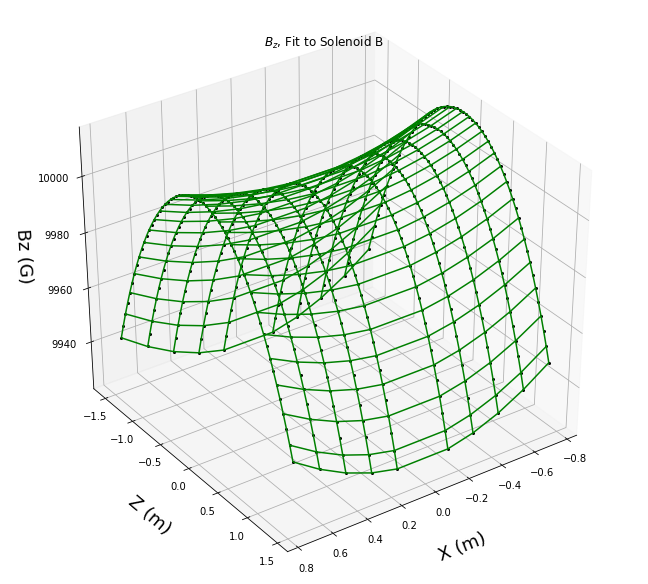

In [10]:
phi=0
fig = mu2e_plot3d(ff.input_data, 'R', 'Z', 'Bz', f'R<=0.8 and Phi=={phi} and -2<Z<2',
            title_simp = r'$B_{z}$, Fit to Solenoid B', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
fig.get_axes()[0].set_xlabel("X (m)")
fig.get_axes()[0].view_init(elev=35., azim=55)
#fig.get_axes()[0].auto_scale_xyz([0, 500], [0, 500], [0, 0.15])
plt.savefig('/home/ckampa/Plots/FieldFitting/bz_B_fit.pdf', bbox_inches='tight')

In [16]:
print(df_aic_cyl.at[12,'AIC'])
cfg_pickle_Cyl_Opt = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solB_scan', save_name='solB_scan', recreate=False)
cfg_params_Cyl_Opt  = cfg_params(pitch1=0, ms_h1=0, ns_h1=0,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=9.2, ms_c1=6, ns_c1=2,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 ks_dict={'k3':10000},
                                 bs_tuples=((0.99515815, 0.0001043687, -4.544769, 0.7261218, 0.0001455341, -2.948864),
                                            (0.996566, -0.0007246328, 4.558813, -0.70979628, -0.0006939468, -2.977626)),
                                 bs_bounds=(1e-3, 1e-3, 4),
                                 version=1000)
hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_1m_cyl,
                                  cfg_geom_Cole_1m_cyl, cfg_params_Cyl_Opt,
                                  cfg_pickle_Cyl_Opt, cfg_plot_none)
df_aic_cyl.at[12,'AIC'] = np.log(-ff.result.aic)
df_aic_cyl.at[12,'chi2'] = ff.result.chisqr
df_aic_cyl.at[12,'redchi'] = ff.result.redchi
print(df_aic_cyl.at[12,'AIC'])

12.014356283130743
fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=6, ns_c1=2, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=((0.99515815, 0.0001043687, -4.544769, 0.7261218, 0.0001455341, -2.948864), (0.996566, -0.0007246328, 4.558813, -0.70979628, -0.0006939468, -2.977626)), bs_bounds=(0.001, 0.001, 4), version=1000)


/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/scipy/optimize/_lsq/least_squares.py:111: UserWarning:

`ftol` is too low, setting to machine epsilon 2.220446049250313e-16.

/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/scipy/optimize/_lsq/least_squares.py:114: UserWarning:

`xtol` is too low, setting to machine epsilon 2.220446049250313e-16.

/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/scipy/optimize/_lsq/least_squares.py:117: UserWarning:

`gtol` is too low, setting to machine epsilon 2.220446049250313e-16.



`xtol` termination condition is satisfied.
Function evaluations 45, initial cost 2.9200e+06, final cost 6.1028e-01, first-order optimality 3.46e-05.
Elapsed time was 12.0863 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 45
    # data points      = 17280
    # variables        = 27
    chi-square         = 1.22055720
    reduced chi-square = 7.0745e-05
    Akaike info crit   = -165108.198
    Bayesian info crit = -164898.751
[[Variables]]
    pitch1:   0 (fixed)
    ms_h1:    0 (fixed)
    ns_h1:    0 (fixed)
    pitch2:   0 (fixed)
    ms_h2:    0 (fixed)
    ns_h2:    0 (fixed)
    length1:  9.2 (fixed)
    ms_c1:    6 (fixed)
    ns_c1:    2 (fixed)
    length2:  0 (fixed)
    ms_c2:    0 (fixed)
    ns_c2:    0 (fixed)
    Ac1_0_0: -0.89425849 (init = -1)
    Bc1_0_0:  583.507591 (init = -1)
    Dc1_0:    0.15517740 (init = 1)
    Ac1_0_1: -5.67128877 (init = -1)
    Bc1_0_1:  460.185958 (init = -1)
    Dc1_1:    1.00000000 (init = 0)
   

In [17]:
print(df_aic_cyl.at[13,'AIC'])
cfg_pickle_Cyl_Opt = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solB_scan', save_name='solB_scan', recreate=False)
cfg_params_Cyl_Opt  = cfg_params(pitch1=0, ms_h1=0, ns_h1=0,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=9.2, ms_c1=6, ns_c1=3,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 ks_dict={'k3':10000},
                                 bs_tuples=((0.99515815, 0.0001043687, -4.544769, 0.7261218, 0.0001455341, -2.948864),
                                            (0.996566, -0.0007246328, 4.558813, -0.70979628, -0.0006939468, -2.977626)),
                                 bs_bounds=(1e-3, 1e-3, 4),
                                 version=1000)
hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_1m_cyl,
                                  cfg_geom_Cole_1m_cyl, cfg_params_Cyl_Opt,
                                  cfg_pickle_Cyl_Opt, cfg_plot_none)
df_aic_cyl.at[13,'AIC'] = np.log(-ff.result.aic)
df_aic_cyl.at[13,'chi2'] = ff.result.chisqr
df_aic_cyl.at[13,'redchi'] = ff.result.redchi
print(df_aic_cyl.at[13,'AIC'])

12.348276607034638
fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=6, ns_c1=3, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=((0.99515815, 0.0001043687, -4.544769, 0.7261218, 0.0001455341, -2.948864), (0.996566, -0.0007246328, 4.558813, -0.70979628, -0.0006939468, -2.977626)), bs_bounds=(0.001, 0.001, 4), version=1000)


/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/scipy/optimize/_lsq/least_squares.py:111: UserWarning:

`ftol` is too low, setting to machine epsilon 2.220446049250313e-16.

/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/scipy/optimize/_lsq/least_squares.py:114: UserWarning:

`xtol` is too low, setting to machine epsilon 2.220446049250313e-16.

/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/scipy/optimize/_lsq/least_squares.py:117: UserWarning:

`gtol` is too low, setting to machine epsilon 2.220446049250313e-16.



`xtol` termination condition is satisfied.
Function evaluations 51, initial cost 2.9193e+06, final cost 1.3588e-02, first-order optimality 4.24e-05.
Elapsed time was 17.391 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 51
    # data points      = 17280
    # variables        = 40
    chi-square         = 0.02717549
    reduced chi-square = 1.5763e-06
    Akaike info crit   = -230828.234
    Bayesian info crit = -230517.942
[[Variables]]
    pitch1:   0 (fixed)
    ms_h1:    0 (fixed)
    ns_h1:    0 (fixed)
    pitch2:   0 (fixed)
    ms_h2:    0 (fixed)
    ns_h2:    0 (fixed)
    length1:  9.2 (fixed)
    ms_c1:    6 (fixed)
    ns_c1:    3 (fixed)
    length2:  0 (fixed)
    ms_c2:    0 (fixed)
    ns_c2:    0 (fixed)
    Ac1_0_0:  106.585074 (init = -1)
    Bc1_0_0:  66980.4009 (init = -1)
    Dc1_0:    0.15524133 (init = 1)
    Ac1_0_1: -11.0217183 (init = -1)
    Bc1_0_1: -279.603028 (init = -1)
    Dc1_1:    1.00000000 (init = 0.5)
  

In [31]:
print(df_aic_cyl.at[14,'AIC'])
cfg_pickle_Cyl_Opt = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solB_scan', save_name='solB_scan', recreate=False)
cfg_params_Cyl_Opt  = cfg_params(pitch1=0, ms_h1=0, ns_h1=0,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=9.2, ms_c1=6, ns_c1=4,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 ks_dict={'k3':10000},
                                 bs_tuples=((0.99515815, 0.0001043687, -4.544769, 0.7261218, 0.0001455341, -2.948864),
                                            (0.996566, -0.0007246328, 4.558813, -0.70979628, -0.0006939468, -2.977626)),
                                 bs_bounds=(1e-3, 1e-3, 4),
                                 version=1000)
hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_1m_cyl,
                                  cfg_geom_Cole_1m_cyl, cfg_params_Cyl_Opt,
                                  cfg_pickle_Cyl_Opt, cfg_plot_none)
df_aic_cyl.at[14,'AIC'] = np.log(-ff.result.aic)
df_aic_cyl.at[14,'chi2'] = ff.result.chisqr
df_aic_cyl.at[14,'redchi'] = ff.result.redchi
print(df_aic_cyl.at[14,'AIC'])

12.077665489187238
fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=6, ns_c1=4, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=((0.99515815, 0.0001043687, -4.544769, 0.7261218, 0.0001455341, -2.948864), (0.996566, -0.0007246328, 4.558813, -0.70979628, -0.0006939468, -2.977626)), bs_bounds=(0.001, 0.001, 4), version=1000)
`xtol` termination condition is satisfied.
Function evaluations 44, initial cost 2.9193e+06, final cost 1.3175e-02, first-order optimality 2.46e-05.
Elapsed time was 36.2808 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 45
    # data points      = 17280
    # variables        = 53
    chi-square         = 0.02635
    reduced chi-square = 0.00000
    Akaike info crit   = -231335.31281
    Bayesian info crit = -230924.17564
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h

In [29]:
cfg_pickle_Cyl_Opt = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solB_scan', save_name='solB_scan', recreate=False)
cfg_params_Cyl_Opt  = cfg_params(pitch1=0, ms_h1=0, ns_h1=0,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=9.2, ms_c1=5, ns_c1=4,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 ks_dict={'k3':10000},
                                 bs_tuples=((1, 0, -4.6),
                                            (1, 0, 4.6)),
                                 bs_bounds=(0.1, 0.1, 4),
                                 version=1000)
hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_1m_cyl,
                                  cfg_geom_Cole_1m_cyl, cfg_params_Cyl_Opt,
                                  cfg_pickle_Cyl_Opt, cfg_plot_none)
df_aic_cyl.at[11,'AIC'] = np.log(-ff.result.aic)

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=5, ns_c1=4, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=((1, 0, -4.6), (1, 0, 4.6)), bs_bounds=(0.1, 0.1, 4), version=1000)
`xtol` termination condition is satisfied.
Function evaluations 43, initial cost 2.9183e+06, final cost 1.2282e-02, first-order optimality 7.38e-04.
Elapsed time was 30.1671 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 44
    # data points      = 17280
    # variables        = 57
    chi-square         = 0.02456
    reduced chi-square = 0.00000
    Akaike info crit   = -232540.52531
    Bayesian info crit = -232098.35893
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   9.2 (fixed)
    ms_c1:     5 (fixed)
    ns_c1:     4 (fixed)
    length2:   0 (fixed)
   

In [33]:
cfg_pickle_Cyl_Opt = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solB_scan', save_name='solB_scan', recreate=False)
cfg_params_Cyl_Opt  = cfg_params(pitch1=0, ms_h1=0, ns_h1=0,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=9.2, ms_c1=7, ns_c1=4,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 ks_dict={'k3':10000},
                                 bs_tuples=((1, 0, -4.6),
                                            (1, 0, 4.6)),
                                 bs_bounds=(0.1, 0.1, 4),
                                 version=1000)
hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_1m_cyl,
                                  cfg_geom_Cole_1m_cyl, cfg_params_Cyl_Opt,
                                  cfg_pickle_Cyl_Opt, cfg_plot_none)
df_aic_cyl.at[17,'AIC'] = np.log(-ff.result.aic)

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=7, ns_c1=4, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=((1, 0, -4.6), (1, 0, 4.6)), bs_bounds=(0.1, 0.1, 4), version=1000)
`xtol` termination condition is satisfied.
Function evaluations 46, initial cost 2.9269e+06, final cost 1.2037e-02, first-order optimality 7.36e-05.
Elapsed time was 36.3557 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 47
    # data points      = 17280
    # variables        = 73
    chi-square         = 0.02407
    reduced chi-square = 0.00000
    Akaike info crit   = -232855.59188
    Bayesian info crit = -232289.30861
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   9.2 (fixed)
    ms_c1:     7 (fixed)
    ns_c1:     4 (fixed)
    length2:   0 (fixed)
   

In [18]:
df_aic_cyl.eval('logchi2 = log(chi2)', inplace=True)
df_aic_cyl.to_pickle('pickles/df_aic_solB.pkl')

In [19]:
print(df_aic_cyl.query('ms==5 and ns==3').chi2)
print(df_aic_cyl.query('ms==7 and ns==4').chi2)

10    0.055485
Name: chi2, dtype: float64
17    0.024595
Name: chi2, dtype: float64


Text(0.5, 1.0, 'Fit Quality For Solenoid B')

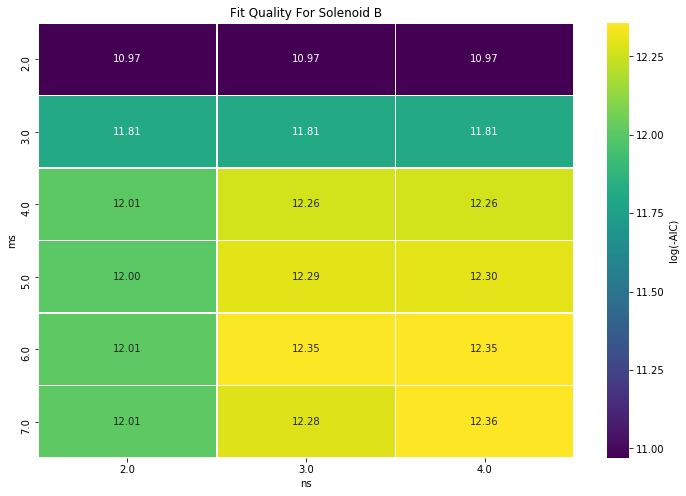

In [22]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)

ax = sns.heatmap(df_aic_cyl.pivot('ms', 'ns', 'AIC'), annot=True, fmt='.2f', linewidths=.5, cmap='viridis',
           cbar_kws={'label': 'log(-AIC)'}, xticklabels=1)
plt.title(f'Fit Quality For Solenoid B')
#plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/aic_solB_v2.pdf')

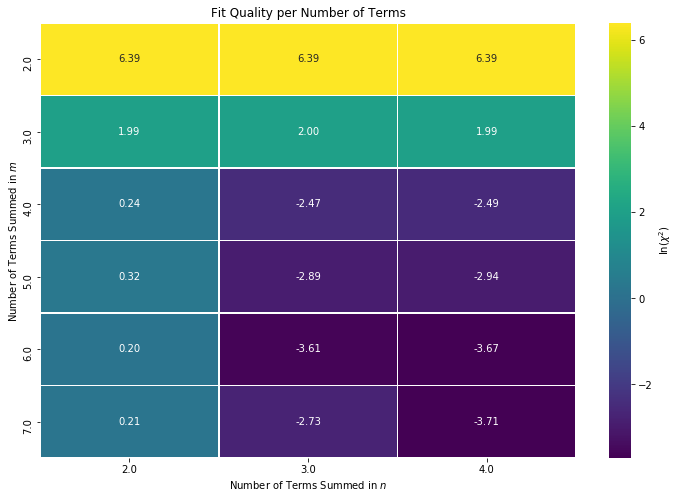

In [24]:
from matplotlib.ticker import FormatStrFormatter

ax = sns.heatmap(df_aic_cyl.pivot('ms', 'ns', 'logchi2'), annot=True, fmt='.2f', linewidths=.5, cmap='viridis',
                            cbar_kws={'label': r'$\ln(\chi^2)$'})
plt.title('Fit Quality per Number of Terms')
plt.ylabel(r'Number of Terms Summed in $m$')
plt.xlabel(r'Number of Terms Summed in $n$')
plt.savefig('/home/ckampa/Plots/FieldFitting/chi2_solB.pdf')
#plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/chi2_solB.pdf')
#plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/aic_solB_v2.pdf')

# Fit Plots

In [25]:
cfg_pickle_Cyl_Opt = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solC_cyl_val', save_name='solC_cyl_val', recreate=False)
cfg_params_Cyl_Opt  = cfg_params(pitch1=0, ms_h1=0, ns_h1=0,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=9.2, ms_c1=5, ns_c1=3,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 ks_dict={'k3':10000},
                                 bs_tuples=((1, 0, -4.6),
                                            (1, 0, 4.6)),
                                 bs_bounds=(0.1, 0.1, 4),
                                 version=1000)
hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_1m_cyl,
                                  cfg_geom_Cole_1m_cyl, cfg_params_Cyl_Opt,
                                  cfg_pickle_Cyl_Opt, cfg_plot_none)

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=5, ns_c1=3, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=((1, 0, -4.6), (1, 0, 4.6)), bs_bounds=(0.1, 0.1, 4), version=1000)


/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/scipy/optimize/_lsq/least_squares.py:111: UserWarning:

`ftol` is too low, setting to machine epsilon 2.220446049250313e-16.

/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/scipy/optimize/_lsq/least_squares.py:114: UserWarning:

`xtol` is too low, setting to machine epsilon 2.220446049250313e-16.

/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/scipy/optimize/_lsq/least_squares.py:117: UserWarning:

`gtol` is too low, setting to machine epsilon 2.220446049250313e-16.



`xtol` termination condition is satisfied.
Function evaluations 133, initial cost 2.9177e+06, final cost 1.2206e-01, first-order optimality 3.65e+00.
Elapsed time was 62.6397 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 133
    # data points      = 17280
    # variables        = 46
    chi-square         = 0.24411516
    reduced chi-square = 1.4165e-05
    Akaike info crit   = -192881.022
    Bayesian info crit = -192524.186
[[Variables]]
    pitch1:   0 (fixed)
    ms_h1:    0 (fixed)
    ns_h1:    0 (fixed)
    pitch2:   0 (fixed)
    ms_h2:    0 (fixed)
    ns_h2:    0 (fixed)
    length1:  9.2 (fixed)
    ms_c1:    5 (fixed)
    ns_c1:    3 (fixed)
    length2:  0 (fixed)
    ms_c2:    0 (fixed)
    ns_c2:    0 (fixed)
    Ac1_0_0: -338912.155 (init = -1)
    Bc1_0_0:  5326747.65 (init = -1)
    Dc1_0:    0.99968365 (init = 1)
    Ac1_0_1:  13.0466808 (init = -1)
    Bc1_0_1:  31.3441574 (init = -1)
    Dc1_1:    1.00000000 (init = 0.5)

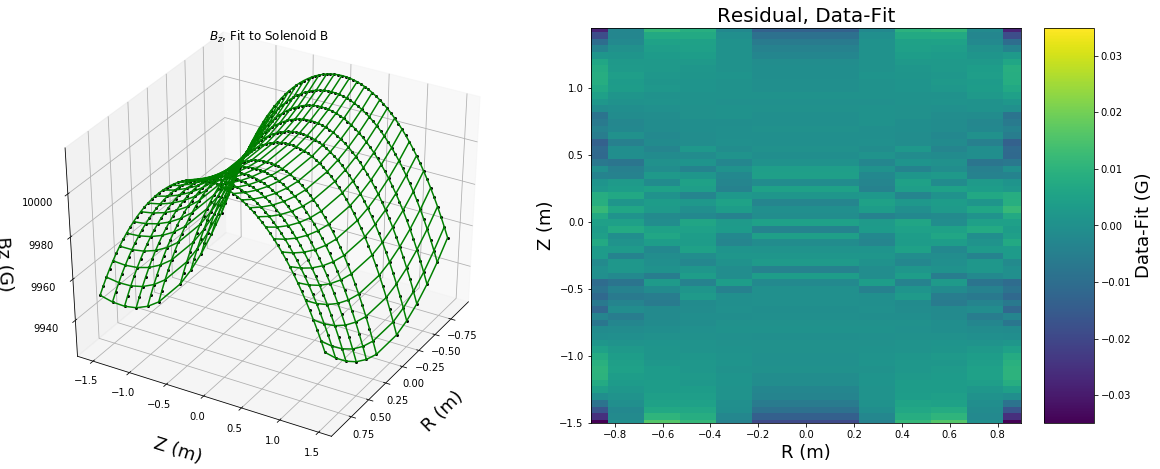

In [26]:
phi=0
fig = mu2e_plot3d(ff.input_data, 'R', 'Z', 'Bz', f'R<=0.9 and Phi=={phi} and -2<Z<2',
            title_simp = r'$B_{z}$, Fit to Solenoid B', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
#plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/bz_B_fit.png', bbox_inches='tight')
plt.savefig('/home/ckampa/Plots/FieldFitting/bz_B_fit.png', bbox_inches='tight')

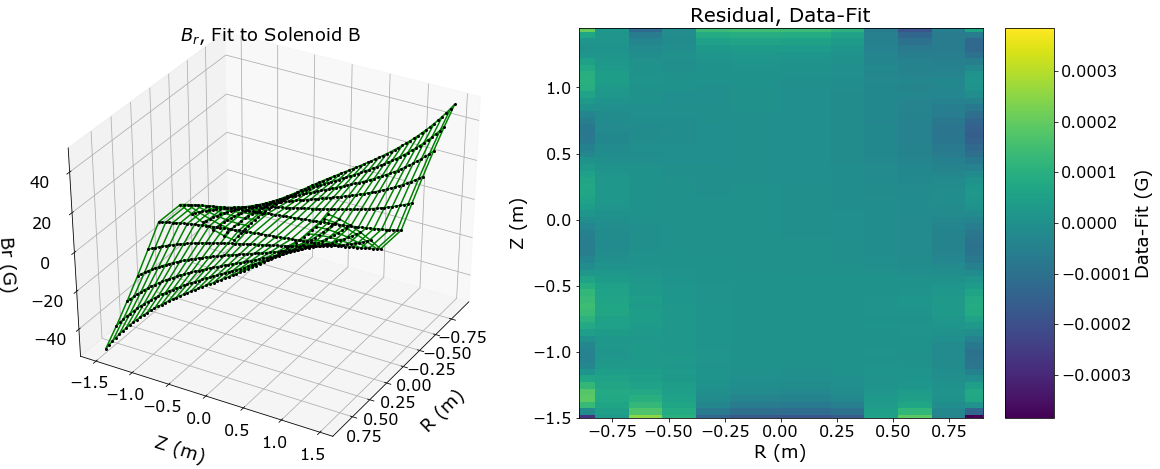

In [38]:
phi=0
fig = mu2e_plot3d(ff.input_data, 'R', 'Z', 'Br', f'R<=0.9 and Phi=={phi} and -2<Z<2',
            title_simp = r'$B_{r}$, Fit to Solenoid B', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/br_B_fit.png', bbox_inches='tight')

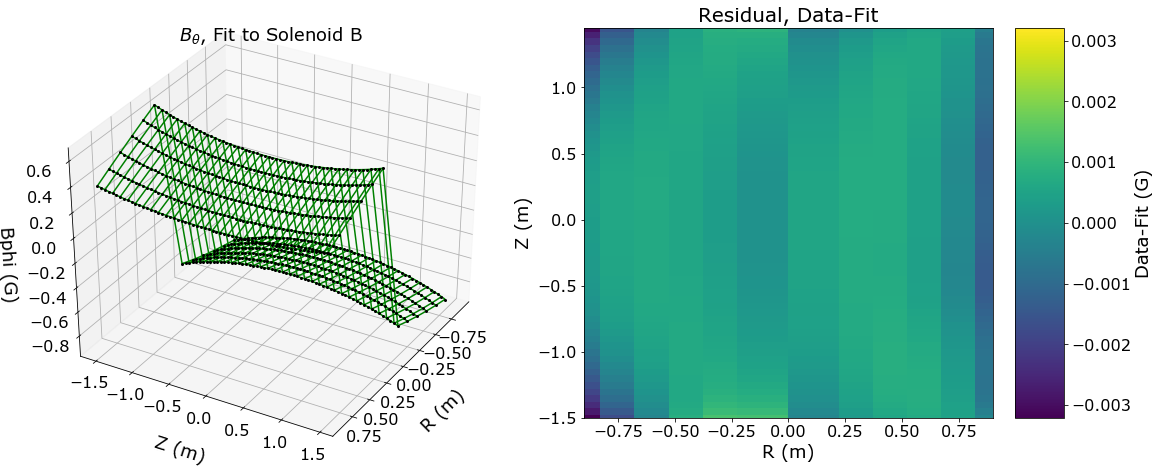

In [39]:
phi=0
fig = mu2e_plot3d(ff.input_data, 'R', 'Z', 'Bphi', f'R<=0.9 and Phi=={phi} and -2<Z<2',
            title_simp = r'$B_{\theta}$, Fit to Solenoid B', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/bt_B_fit.png', bbox_inches='tight')

# Validation

In [31]:
cfg_pickle_Cyl_fs = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solC_cyl_val', save_name='solC_cyl_val', recreate=True)
_, ff_fullsim = field_map_analysis('fma_fit_solC', cfg_data_Cole_1m_cyl,
                                  cfg_geom_Cole_1m_cyl_hg, cfg_params_Cyl_Opt,
                                  cfg_pickle_Cyl_fs, cfg_plot_none)
df_fs =ff_fullsim.input_data

MemoryError: 

In [42]:
df_fs.eval('Bmag = (Bz**2+Br**2+Bphi**2)**(1/2)', inplace=True)
df_fs.eval('Bmag_fit = (Bz_fit**2+Br_fit**2+Bphi_fit**2)**(1/2)', inplace=True)

NameError: name 'df_fs' is not defined

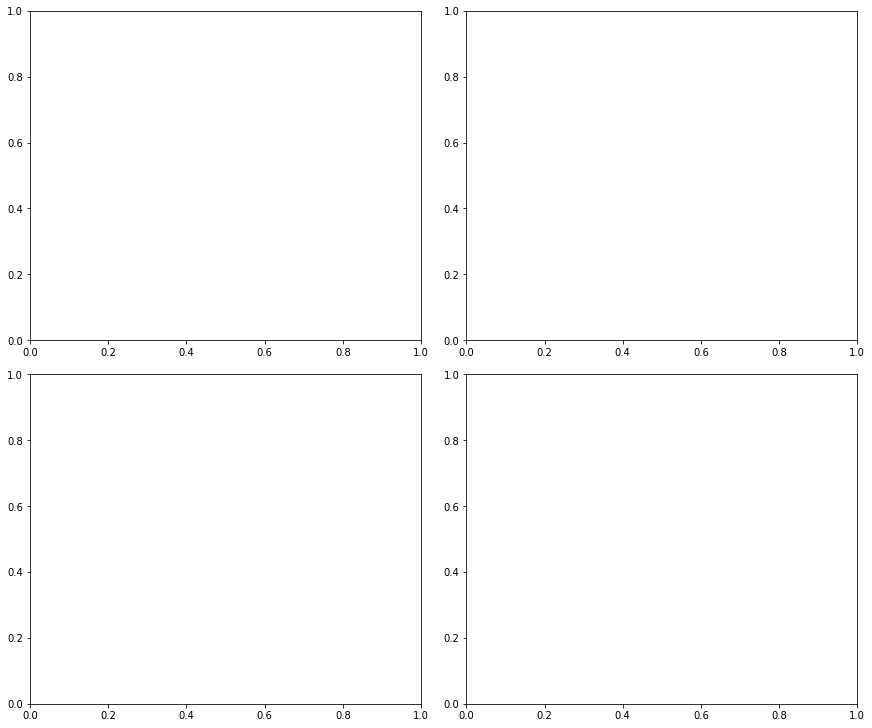

In [29]:
# fig = plt.figure(figsize=plt.figaspect(0.3), constrained_layout=False)
# fig.text(0.5,0.01, "Data-Fit (G)", ha="center", va="center", fontsize=18)
# ax = fig.add_subplot(1, 3, 1)
# ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useOffset=False)
# _ = splt.hist((df_fs.Bz-df_fs.Bz_fit), ax=ax, bins=100, log=True, color='r')
# ax.set_title(r'$B_{z}$')
# ax.set_ylabel('Counts')
# ax = fig.add_subplot(1, 3, 2)
# ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# _ = splt.hist((df_fs.Br-df_fs.Br_fit), ax=ax, bins=100, log=True, color='r')
# ax.set_title(r'$B_r$')
# ax = fig.add_subplot(1, 3, 3)
# ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# _ = splt.hist((df_fs.Bphi-df_fs.Bphi_fit), ax=ax, bins=100, log=True, color='r')
# ax.set_title(r'$B_{\theta}$')
# fig.suptitle('B Component Residuals', verticalalignment='bottom')
# plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/res_solB.pdf', bbox_inches='tight')

fig, axs = plt.subplots(2, 2, figsize=(12,10), constrained_layout=True)
#fig.text(0.5,0.01, "Data-Fit (G)", ha="center", va="center", fontsize=18)
#ax = fig.add_subplot(2, 2, 1)
_ = splt.hist((df_fs.Bz-df_fs.Bz_fit), ax=axs[0][0], bins=100, log=True)
axs[0][0].set_title(r'$B_z$', fontsize=24)
#axs[0][0].set_ylabel('Counts')
axs[0][0].set_xlabel('Data-Fit (G)')
axs[0][0].ticklabel_format(style='sci', axis='x', scilimits=(0,0), useOffset=False)
_ = splt.hist((df_fs.Br-df_fs.Br_fit), ax=axs[0][1], bins=100, log=True)
axs[0][1].set_title(r'$B_r$', fontsize=24)
axs[0][1].set_xlabel('Data-Fit (G)')
axs[0][1].ticklabel_format(style='sci', axis='x', scilimits=(0,0), useOffset=False)
_ = splt.hist((df_fs.Bphi-df_fs.Bphi_fit), ax=axs[1][0], bins=100, log=True)
axs[1][0].set_title(r'$B_{\theta}$', fontsize=24)
axs[1][0].set_xlabel('Data-Fit (G)')
axs[1][0].ticklabel_format(style='sci', axis='x', scilimits=(0,0), useOffset=False)
_ = splt.hist((df_fs.Bmag-df_fs.Bmag_fit)/df_fs.Bmag, ax=axs[1][1], bins=100, log=True, color='r')
axs[1][1].set_title(r'$B_{mag}$', fontsize=24)
axs[1][1].set_xlabel(r'Relative Residual $\left(\frac{Data-Fit}{Data}\right)$')
axs[1][1].ticklabel_format(style='sci', axis='x', scilimits=(0,0), useOffset=False)
fig.suptitle('Residuals (Cylindrical)', verticalalignment='bottom', fontsize=28)
fig.text(-0.015,0.5, "Counts (Validation Data)", ha="center", va="center", rotation=90, fontsize=25)
#plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/res_solB.pdf', bbox_inches='tight')

2106 362880


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-0.9       , -0.86991194, -0.83982387, -0.80973581, -0.77964774,
        -0.74955968, -0.71947161, -0.68938355, -0.65929548, -0.62920742,
        -0.59911936, -0.56903129, -0.53894323, -0.50885516, -0.4787671 ,
        -0.44867903, -0.41859097, -0.38850291, -0.35841484, -0.32832678,
        -0.29823871, -0.26815065, -0.23806258, -0.20797452, -0.17788645,
        -0.14779839, -0.11771033, -0.08762226, -0.0575342 , -0.02744613,
         0.00264193,  0.03273   ,  0.06281806,  0.09290613,  0.12299419,
         0.15308225,  0.18317032,  0.21325838,  0.24334645,  0.27343451,
         0.30352258,  0.33361064,  0.3636987 ,  0.39378677,  0.42387483,
         0.4539629 ,  0.48405096,  0.51413903,  0.54422709,  0.57431516,
         0.60440322])

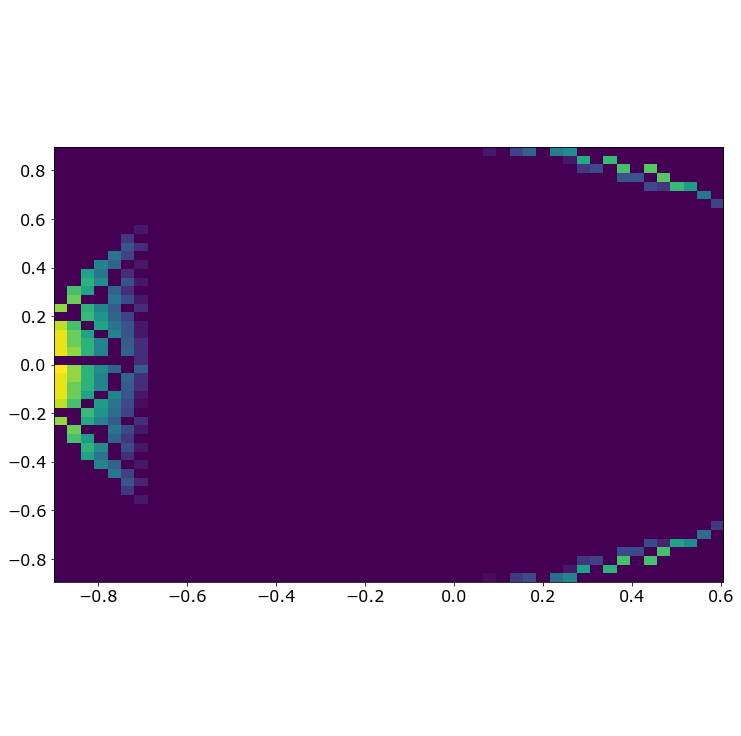

In [61]:
df_skew = df_fs.query('Bphi-Bphi_fit <-2.5e-3')
print(len(df_skew), len(df_fs))
plt.hist2d(df_skew.X, df_skew.Z, bins=50)
plt.hist2d(df_skew.X, df_skew.Y, bins=50)

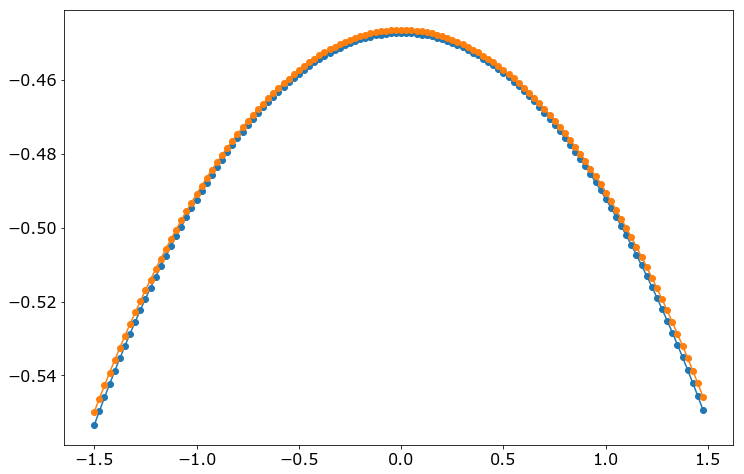

In [90]:
phi = np.pi
#df_skim.query('Phi==0 and R==0.9')
bphi_1 = df_fs.query(f'Phi>({phi}-0.01) and Phi<({phi}+0.01) and R==0.9').Bphi.values
bphi_2 = df_fs.query(f'Phi==0 and R==0.9').Bphi.values
bphi_fit_1 = df_fs.query(f'Phi>({phi}-0.01) and Phi<({phi}+0.01) and R==0.9').Bphi_fit.values
bphi_fit_2 = df_fs.query(f'Phi==0 and R==0.9').Bphi_fit.values
z = df_fs.query(f'Phi==0 and R==0.9').Z
len(bphi_2)
plt.plot(z, bphi_1+bphi_2, 'o-')
plt.plot(z, bphi_fit_1+bphi_fit_2, 'o-')